In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import itertools
from sklearn.preprocessing import MinMaxScaler
import dtw
import yf_df as yfdf
import csv

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
df_dxy = pd.read_csv("DX=F_2021-01-01.csv", index_col=0)
df_jpy_usd = pd.read_csv("JPY=X_2021-01-01.csv", index_col=0)
df_gbp_usd = pd.read_csv("GBPUSD=X_2021-01-01.csv", index_col=0)
df_tlt = pd.read_csv("TLT_2021-01-01.csv", index_col=0)
df_tnx = pd.read_csv("^TNX_2021-01-01.csv", index_col=0)
df_spx = pd.read_csv("^GSPC_2021-01-01.csv", index_col=0)
df_vix = pd.read_csv("^VIX_2021-01-01.csv", index_col=0)
df_rrp = pd.read_csv("RRPONTSYD.csv", index_col=0)



In [17]:
df_dxy = df_dxy.drop(['High', 'Low', 'Open', 'Adj Close'], axis =1)
df_jpy_usd = df_jpy_usd.drop(['High', 'Low', 'Open', 'Adj Close'], axis =1)
df_gbp_usd = df_gbp_usd.drop(['High', 'Low', 'Open', 'Adj Close'], axis =1)
df_tlt = df_tlt.drop(['High', 'Low', 'Open', 'Adj Close'], axis =1)
df_tnx = df_tnx.drop(['High', 'Low', 'Open', 'Adj Close'], axis =1)
df_spx = df_spx.drop(['High', 'Low', 'Open', 'Adj Close'], axis =1)
df_vix = df_vix.drop(['High', 'Low', 'Open', 'Adj Close'], axis =1)


KeyError: "['High', 'Low', 'Open', 'Adj Close'] not found in axis"

In [4]:
scaler = MinMaxScaler()

sl_spx = scaler.fit_transform(df_spx)
sl_dxy = scaler.fit_transform(df_dxy)
sl_jpy_usd = scaler.fit_transform(df_jpy_usd)
sl_gbp_usd = scaler.fit_transform(df_gbp_usd)
sl_tlt = scaler.fit_transform(df_tlt)
sl_tnx = scaler.fit_transform(df_tnx)
sl_vix = scaler.fit_transform(df_vix)
df_pre_rrp = df_rrp.drop(df_rrp.loc[df_rrp["RRPONTSYD"]=='.'].index)
df_fl_rrp = df_pre_rrp.astype({"RRPONTSYD":'float64'})
sl_rrp = scaler.fit_transform(df_pre_rrp)


In [5]:
arr_index = np.concatenate((sl_spx, sl_vix, sl_tlt, sl_dxy), axis=1)
arr_fx = np.concatenate((sl_jpy_usd, sl_gbp_usd), axis=1)

#df_index = pd.DataFrame(arr_index, index = df_spx.index, columns = ["spx, vix, tlt, dxy"])
df_index = pd.DataFrame(arr_index, columns = ["spx", "vix", "tlt", "dxy"], index = df_spx.index)
df_fx = pd.DataFrame(arr_fx, columns = ["JPY/USD", "GBP/USD"], index = df_jpy_usd.index)
df_pre_rrp = df_rrp.drop(df_rrp.loc[df_rrp["RRPONTSYD"]=='.'].index)
df_fl_rrp = df_pre_rrp.astype({"RRPONTSYD":'float64'})
df_sl_tnx = pd.DataFrame(sl_tnx, columns = ["tnx"], index = df_tnx.index)
df_sum = pd.concat([df_index, df_fx, df_sl_tnx, df_fl_rrp], axis = 1)
df_sum = df_sum.dropna() #공휴일 날리기
df_sum.corr()

,spx,vix,tlt,dxy,JPY/USD,GBP/USD,tnx,RRPONTSYD
spx,1.000000,-0.539206,0.326677,-0.354427,-0.229060,0.472984,-0.262924,-0.052078
vix,-0.539206,1.000000,0.035285,0.274660,0.013978,-0.306109,-0.035685,0.162057
tlt,0.326677,0.035285,1.000000,-0.859746,-0.956026,0.838297,-0.992435,-0.689138
dxy,-0.354427,0.274660,-0.859746,1.000000,0.933233,-0.975202,0.872434,0.844547
JPY/USD,-0.229060,0.013978,-0.956026,0.933233,1.000000,-0.888819,0.967011,0.780051
GBP/USD,0.472984,-0.306109,0.838297,-0.975202,-0.888819,1.000000,-0.845579,-0.814773
tnx,-0.262924,-0.035685,-0.992435,0.872434,0.967011,-0.845579,1.000000,0.725850
RRPONTSYD,-0.052078,0.162057,-0.689138,0.844547,0.780051,-0.814773,0.725850,1.000000


In [6]:
df_sum_23_08 = df_sum[200:500]
df_sum_23_08.dropna()
print(df_sum.index[650])
df_sum_23_08.corr()

2023-08-11


,spx,vix,tlt,dxy,JPY/USD,GBP/USD,tnx,RRPONTSYD
spx,1.000000,-0.588527,0.907163,-0.888248,-0.888734,0.892303,-0.897107,-0.879254
vix,-0.588527,1.000000,-0.354839,0.415618,0.331677,-0.387923,0.354399,0.302745
tlt,0.907163,-0.354839,1.000000,-0.919365,-0.956873,0.915699,-0.993062,-0.908890
dxy,-0.888248,0.415618,-0.919365,1.000000,0.974266,-0.985743,0.909421,0.910941
JPY/USD,-0.888734,0.331677,-0.956873,0.974266,1.000000,-0.968275,0.951171,0.924031
GBP/USD,0.892303,-0.387923,0.915699,-0.985743,-0.968275,1.000000,-0.909228,-0.915185
tnx,-0.897107,0.354399,-0.993062,0.909421,0.951171,-0.909228,1.000000,0.888232
RRPONTSYD,-0.879254,0.302745,-0.908890,0.910941,0.924031,-0.915185,0.888232,1.000000


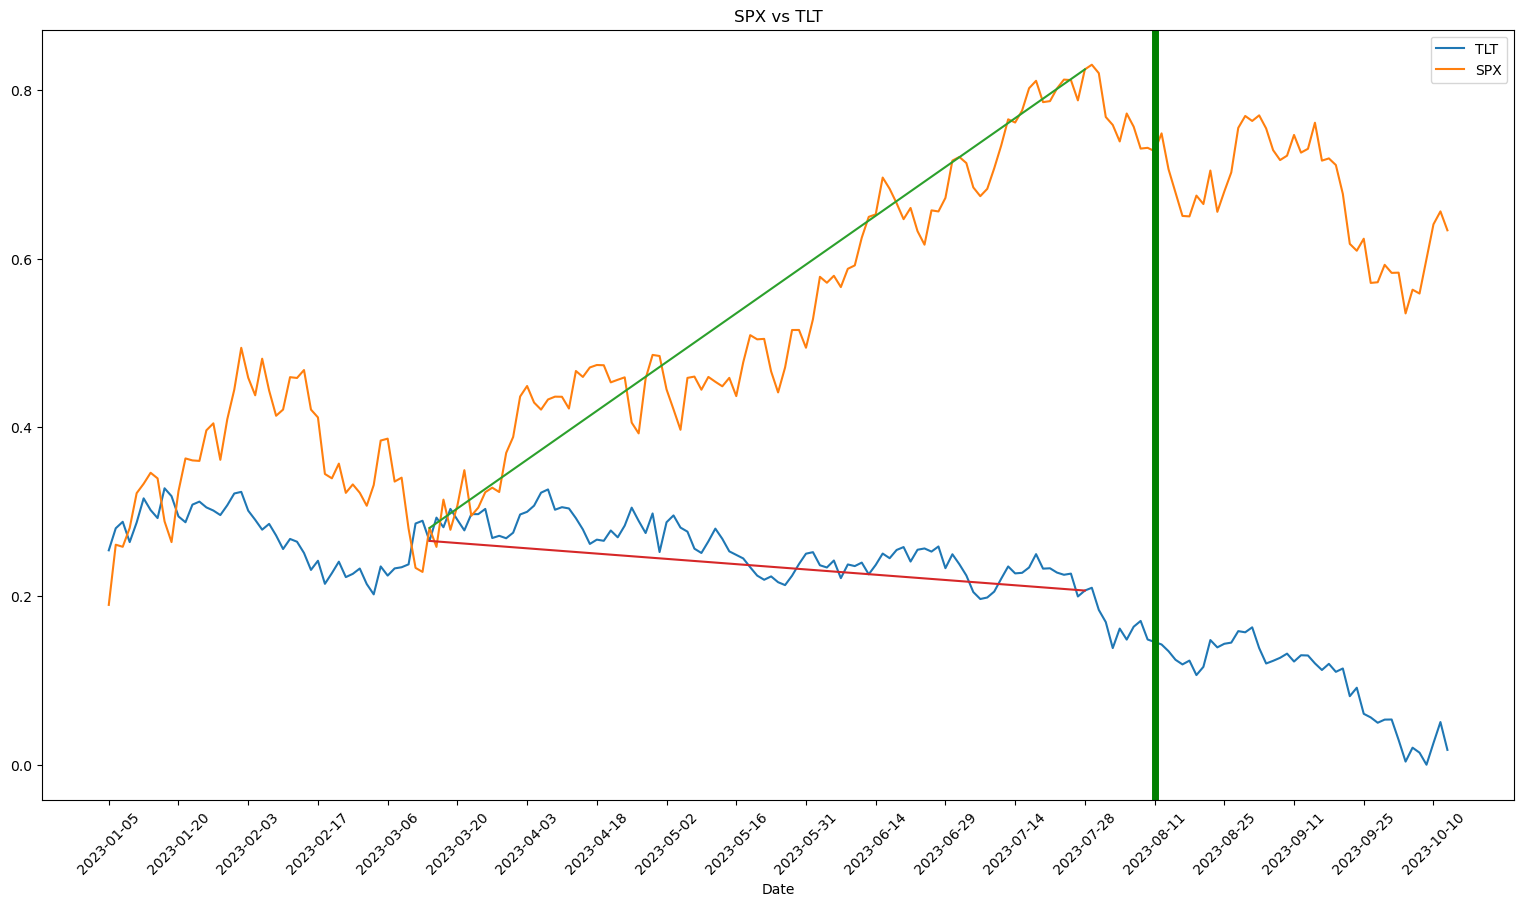

In [7]:
df_23_01 = df_sum[500:]
df_23_01 = df_23_01.dropna()
df_len1 = len(df_23_01)
plt.figure(figsize=(19,10))
#plt.plot(df_23_01.index, df_23_01["dxy"], label = "DXY")
plt.plot(df_23_01.index, df_23_01["tlt"], label = "TLT")
plt.plot(df_23_01.index, df_23_01["spx"], label = "SPX")
plt.plot(["2023-03-14", "2023-07-28"], [df_23_01["spx"].loc["2023-03-14"], df_23_01["spx"].loc["2023-07-28"]])
plt.plot(["2023-03-14", "2023-07-28"], [df_23_01["tlt"].loc["2023-03-14"], df_23_01["tlt"].loc["2023-07-28"]])
plt.legend(ncol = 1)
plt.xlabel("Date")
plt.title("SPX vs TLT")
plt.axvline("2023-08-11", 0, 1, linewidth = 5, color = 'green')
plt.xticks(ticks = np.arange(0, df_len1 +1, 10), rotation = 45)
plt.show()


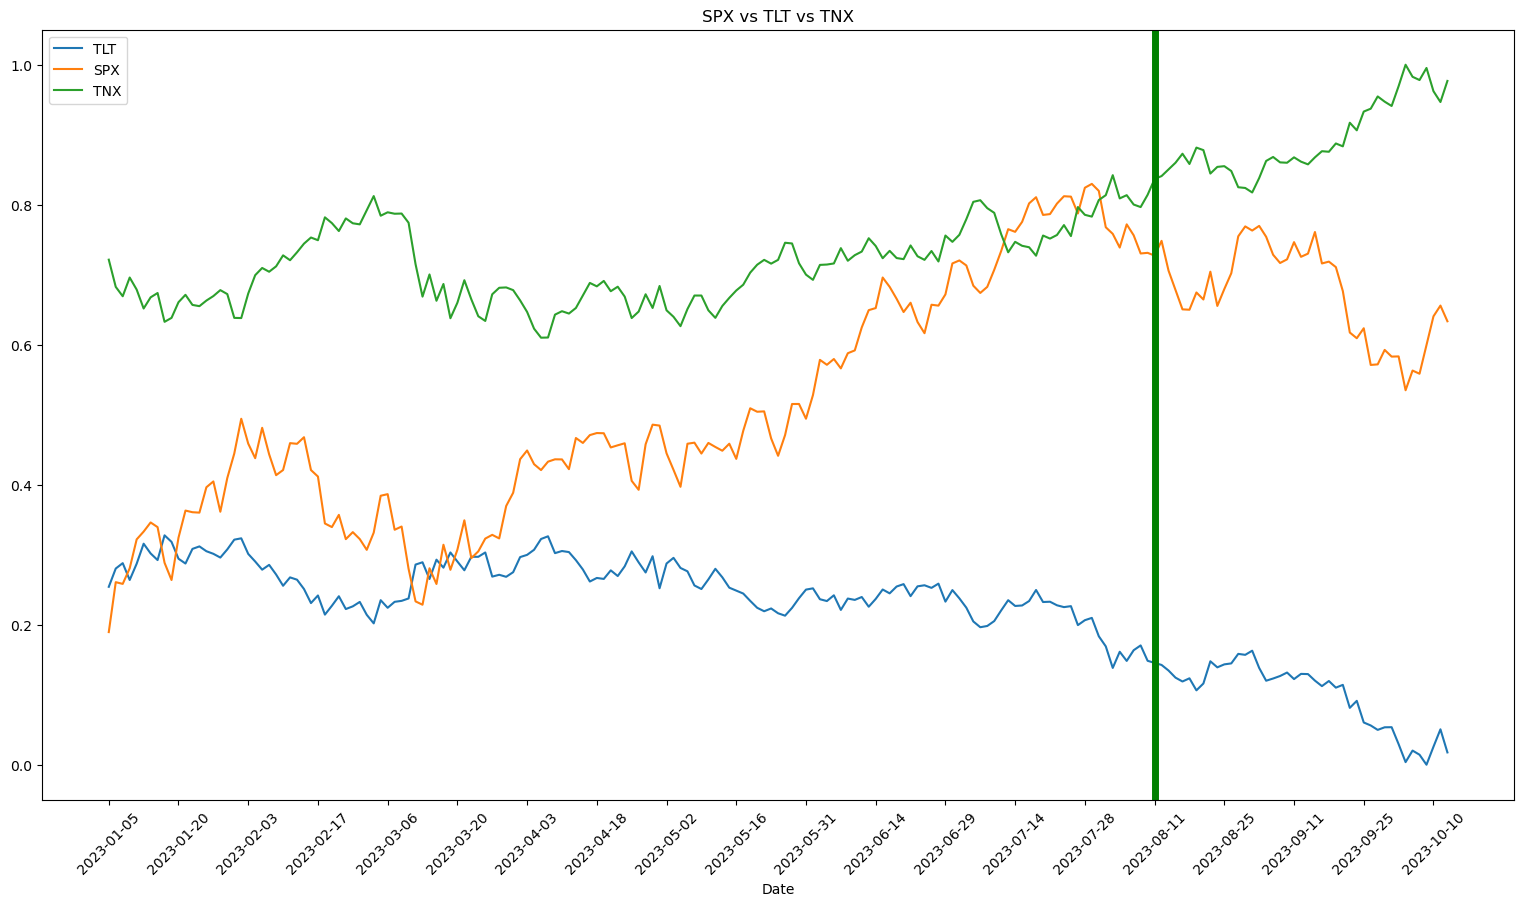

In [8]:
df_23_01 = df_sum[500:]
df_23_01 = df_23_01.dropna()
df_len1 = len(df_23_01)
plt.figure(figsize=(19,10))
#plt.plot(df_23_01.index, df_23_01["dxy"], label = "DXY")
plt.plot(df_23_01.index, df_23_01["tlt"], label = "TLT")
plt.plot(df_23_01.index, df_23_01["spx"], label = "SPX")
plt.plot(df_23_01.index, df_23_01["tnx"], label = "TNX")
#plt.plot(["2023-03-14", "2023-07-28"], [df_23_01["spx"].loc["2023-03-14"], df_23_01["spx"].loc["2023-07-28"]])
#plt.plot(["2023-03-14", "2023-07-28"], [df_23_01["tlt"].loc["2023-03-14"], df_23_01["tlt"].loc["2023-07-28"]])
plt.legend(ncol = 1)
plt.xlabel("Date")
plt.title("SPX vs TLT vs TNX")
plt.axvline("2023-08-11", 0, 1, linewidth = 5, color = 'green')
plt.xticks(ticks = np.arange(0, df_len1 +1, 10), rotation = 45)
plt.show()

In [9]:
print(df_23_01["spx"].loc["2023-03-14"])

0.28064910378874064


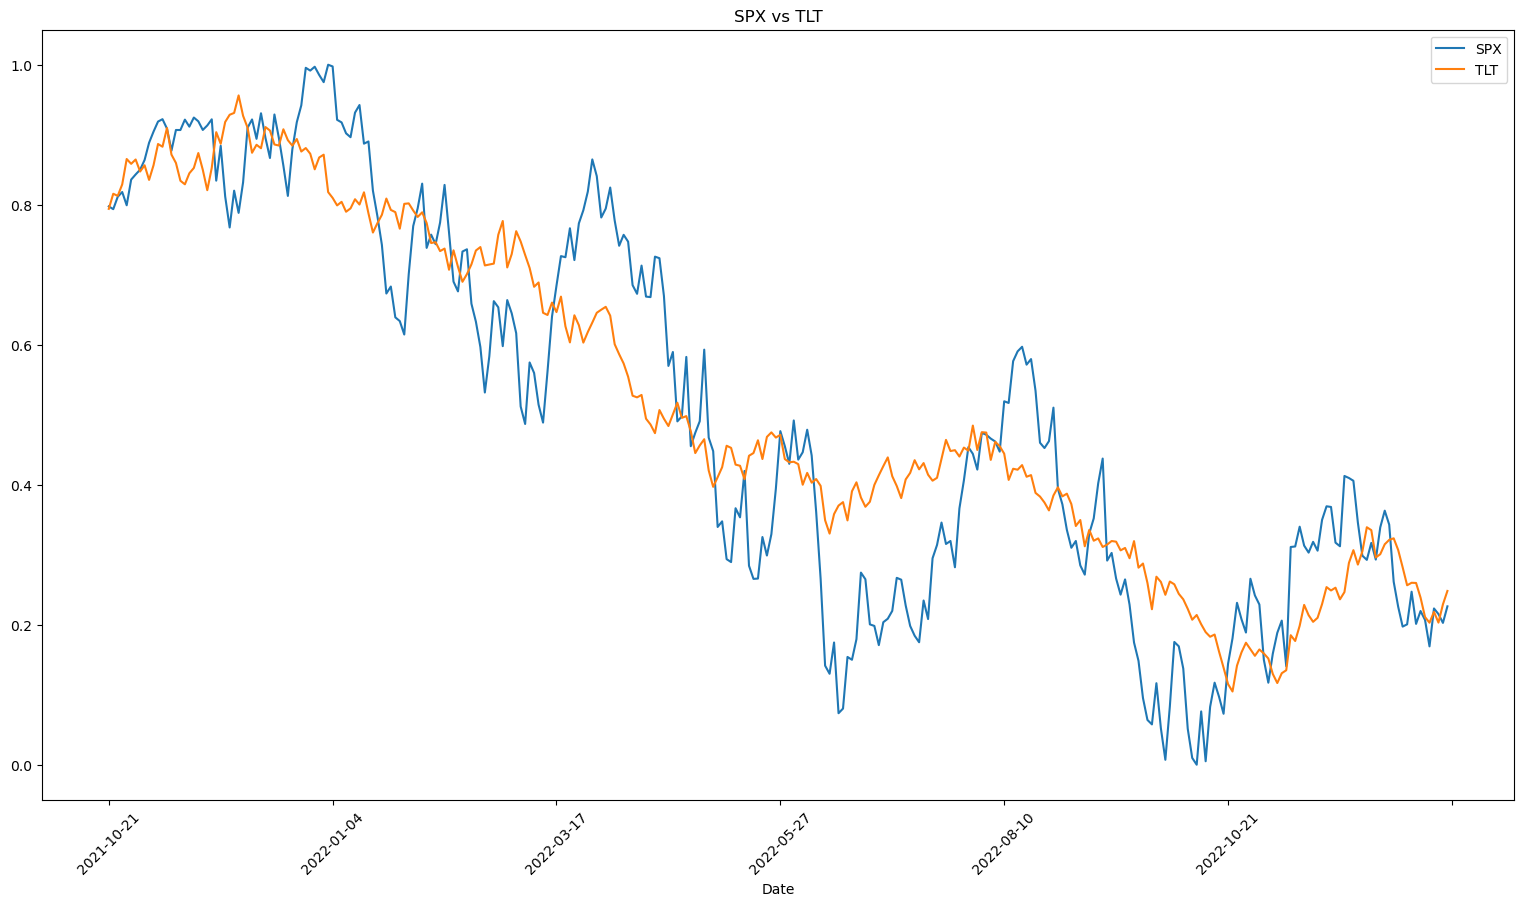

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 2021-01-04 to 2023-10-12
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   spx        693 non-null    float64
 1   vix        693 non-null    float64
 2   tlt        693 non-null    float64
 3   dxy        693 non-null    float64
 4   JPY/USD    693 non-null    float64
 5   GBP/USD    693 non-null    float64
 6   tnx        693 non-null    float64
 7   RRPONTSYD  693 non-null    float64
dtypes: float64(8)
memory usage: 48.7+ KB


In [10]:
df_sum_22 = df_sum[200:500]
df_len1 = len(df_sum_22)
plt.figure(figsize=(19,10))

plt.plot(df_sum_22.index, df_sum_22["spx"], label = "SPX")
plt.plot(df_sum_22.index, df_sum_22["tlt"], label = "TLT")
#plt.plot(df_sum.index, df_sum["dxy"], label = "DXY")
plt.legend(ncol = 1)
plt.xlabel("Date")
plt.title("SPX vs TLT")
#plt.axvline("2023-08-11", 0, 1, linewidth = 5)
plt.xticks(ticks = np.arange(0, df_len1 +1, 50), rotation = 45)
plt.show()

df_sum.info()


In [11]:

#sl_rrp = scaler.fit_transform(df_rrp)

#df_rrp.loc[df_rrp["RRPONTSYD"]=='.'].index
df_pre_rrp = df_rrp.drop(df_rrp.loc[df_rrp["RRPONTSYD"]=='.'].index)
df_fl_rrp = df_pre_rrp.astype({"RRPONTSYD":'float64'})
sl_rrp = scaler.fit_transform(df_fl_rrp)
df_fl_rrp
df_sl_rrp = pd.DataFrame(sl_rrp, columns = ["RRPONTSYD"], index = df_pre_rrp.index)
df_fl_rrp

,RRPONTSYD
DATE,
2021-01-04,0.001
2021-01-05,0.005
2021-01-06,0.004
2021-01-07,0.001
2021-01-08,0.000
...,...
2023-10-06,1283.461
2023-10-10,1222.440
2023-10-11,1239.382


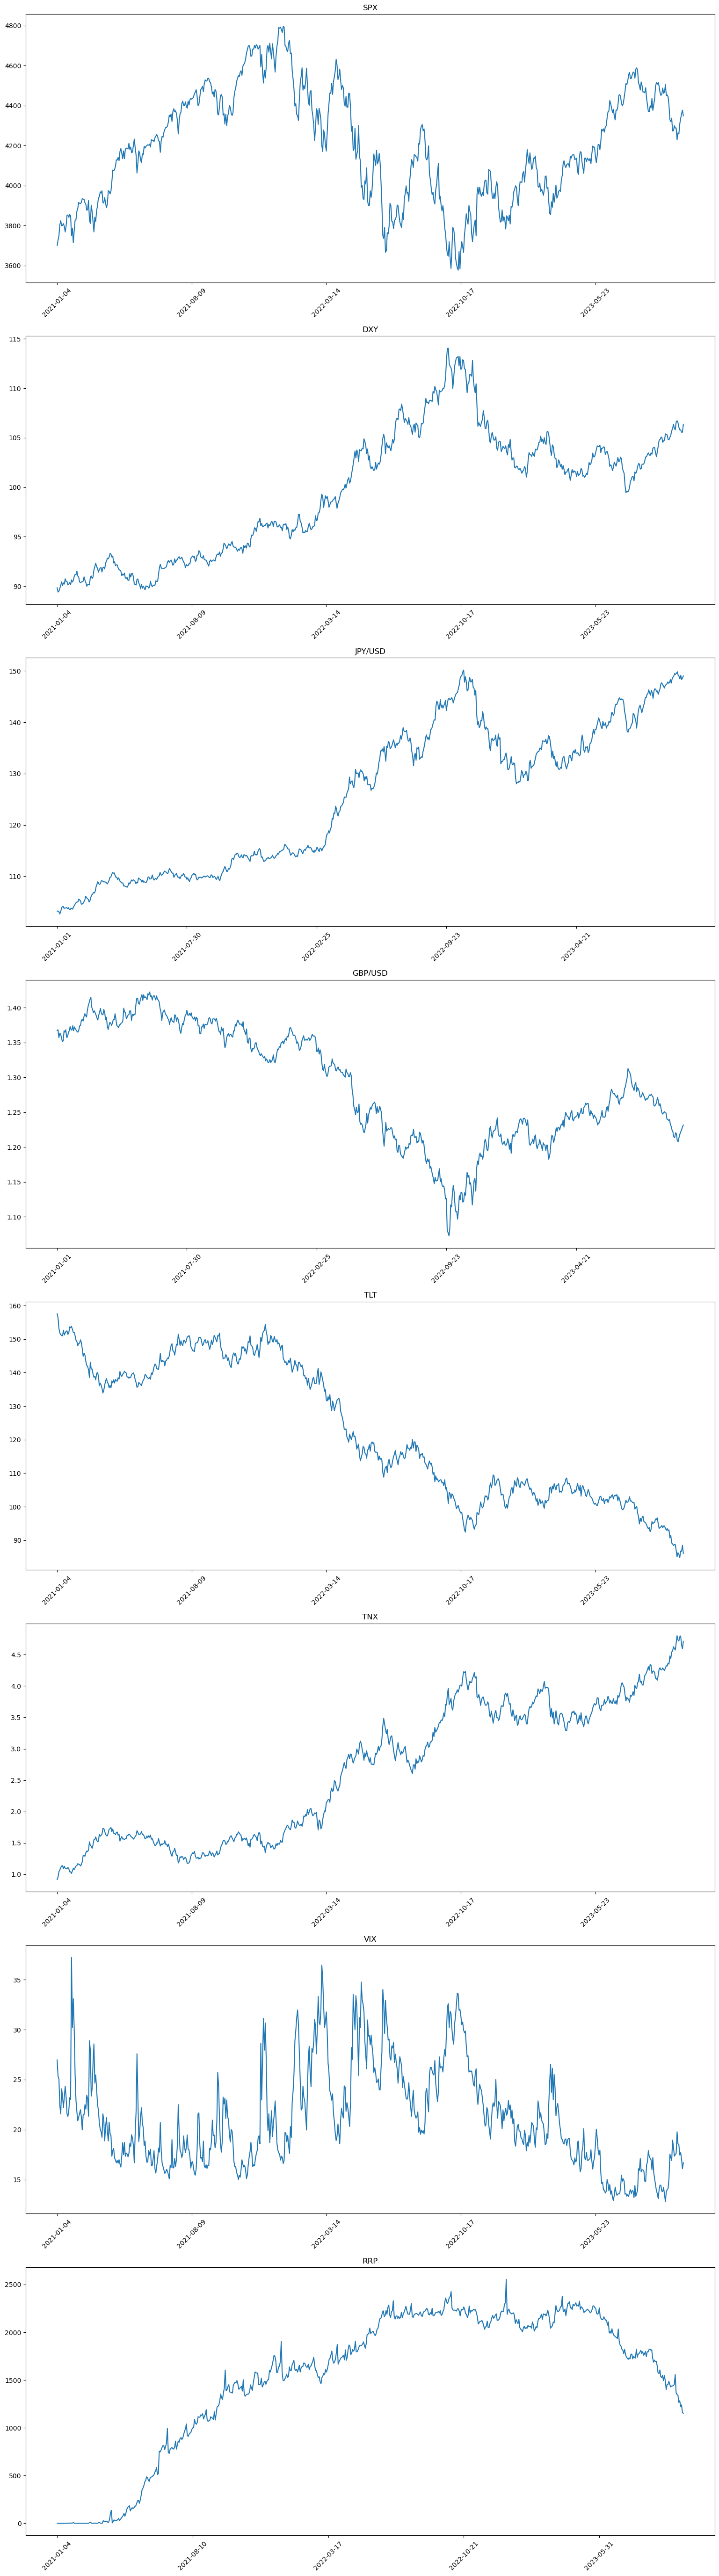

In [12]:
df_len = len(df_spx)
plt.figure(figsize = (19,70))
plt.subplot(8,1,1)
plt.plot(df_spx.index, df_spx["Close"])
plt.title("SPX")
plt.xticks(ticks = np.arange(0, df_len +1, 150), rotation = 45)

plt.subplot(8,1,2)
plt.plot(df_dxy.index, df_dxy["Close"])
plt.title("DXY")
plt.xticks(ticks = np.arange(0, df_len +1, 150), rotation = 45)

plt.subplot(8,1,3)
plt.plot(df_jpy_usd.index, df_jpy_usd["Close"])
plt.title("JPY/USD")
plt.xticks(ticks = np.arange(0, df_len +1, 150), rotation = 45)

plt.subplot(8,1,4)
plt.plot(df_gbp_usd.index, df_gbp_usd["Close"])
plt.title("GBP/USD")
plt.xticks(ticks = np.arange(0, df_len +1, 150), rotation = 45)

plt.subplot(8,1,5)
plt.plot(df_tlt.index, df_tlt["Close"])
plt.title("TLT")
plt.xticks(ticks = np.arange(0, df_len +1, 150), rotation = 45)

plt.subplot(8,1,6)
plt.plot(df_tnx.index, df_tnx["Close"])
plt.title("TNX")
plt.xticks(ticks = np.arange(0, df_len +1, 150), rotation = 45)

plt.subplot(8,1,7)
plt.plot(df_vix.index, df_vix["Close"])
plt.title("VIX")
plt.xticks(ticks = np.arange(0, df_len +1, 150), rotation = 45)

plt.subplot(8,1,8)
plt.plot(df_fl_rrp.index, df_fl_rrp["RRPONTSYD"])
plt.title("RRP")
plt.xticks(ticks = np.arange(0, df_len +1, 150), rotation = 45)


plt.show()

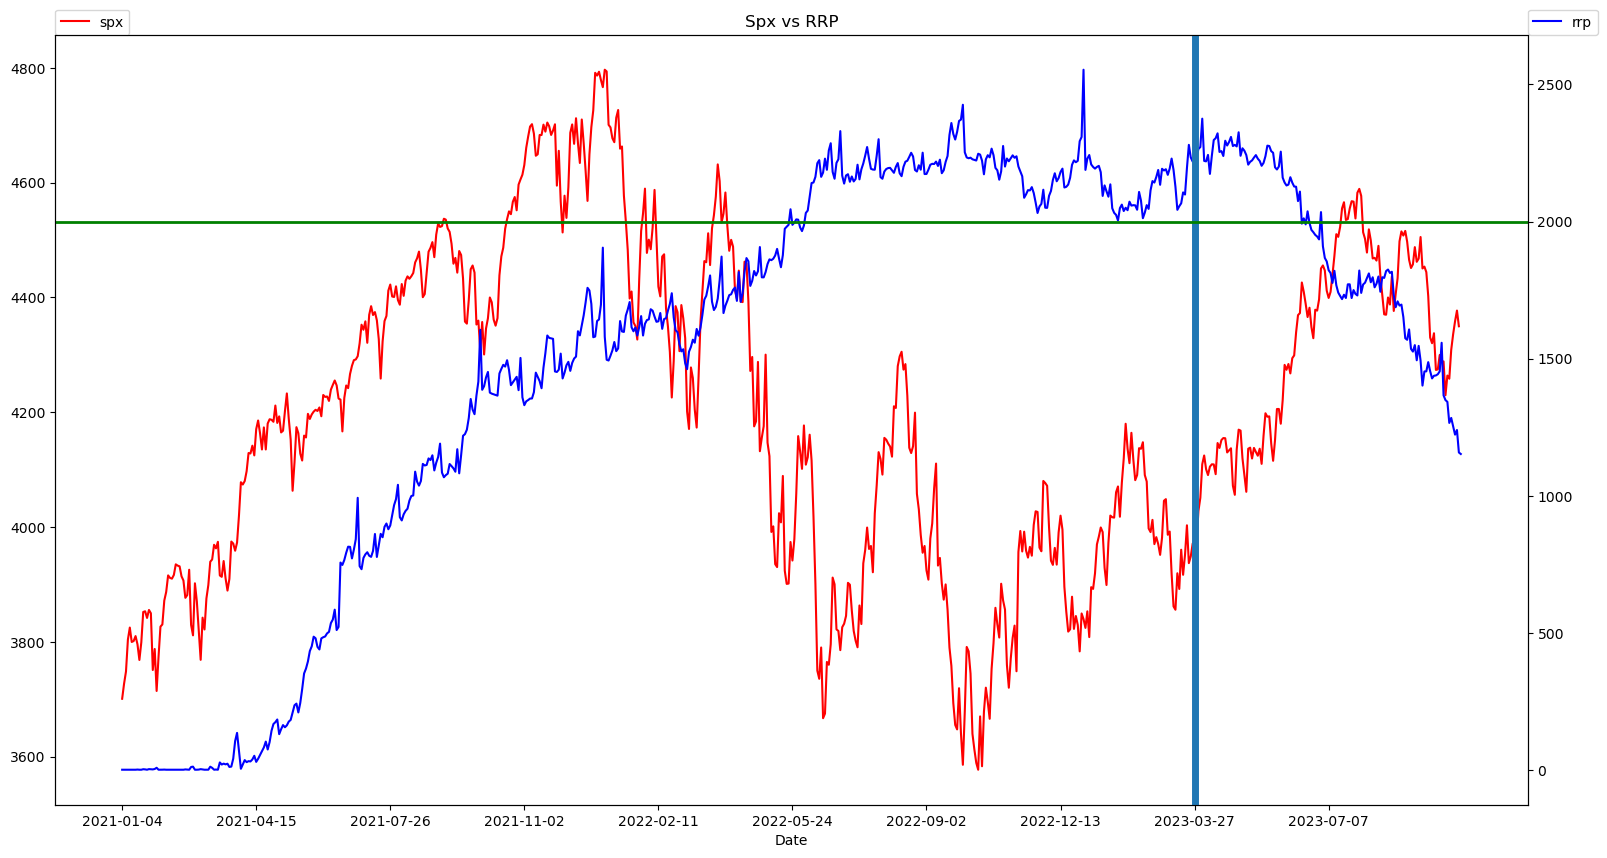

In [13]:
df_len = len(df_spx)

fig, ax1 = plt.subplots(figsize=(19, 10))
ax2 = ax1.twinx()
ax1.plot(df_spx.index, df_spx["Close"] ,'r', label = "spx")
ax2.plot(df_fl_rrp.index, df_fl_rrp["RRPONTSYD"], 'b', label = "rrp")
ax1.set_xlabel("Date")

plt.xticks(ticks = np.arange(0, df_len +1, 70), rotation = 45)
plt.axvline("2023-03-27", 0, 1, linewidth = 5)
ax2.axhline(2000, 0, 1, linewidth = 2, color = "green")
ax1.legend(loc=(0, 1))
ax2.legend(loc = (1,1))
plt.title("Spx vs RRP")
plt.show()



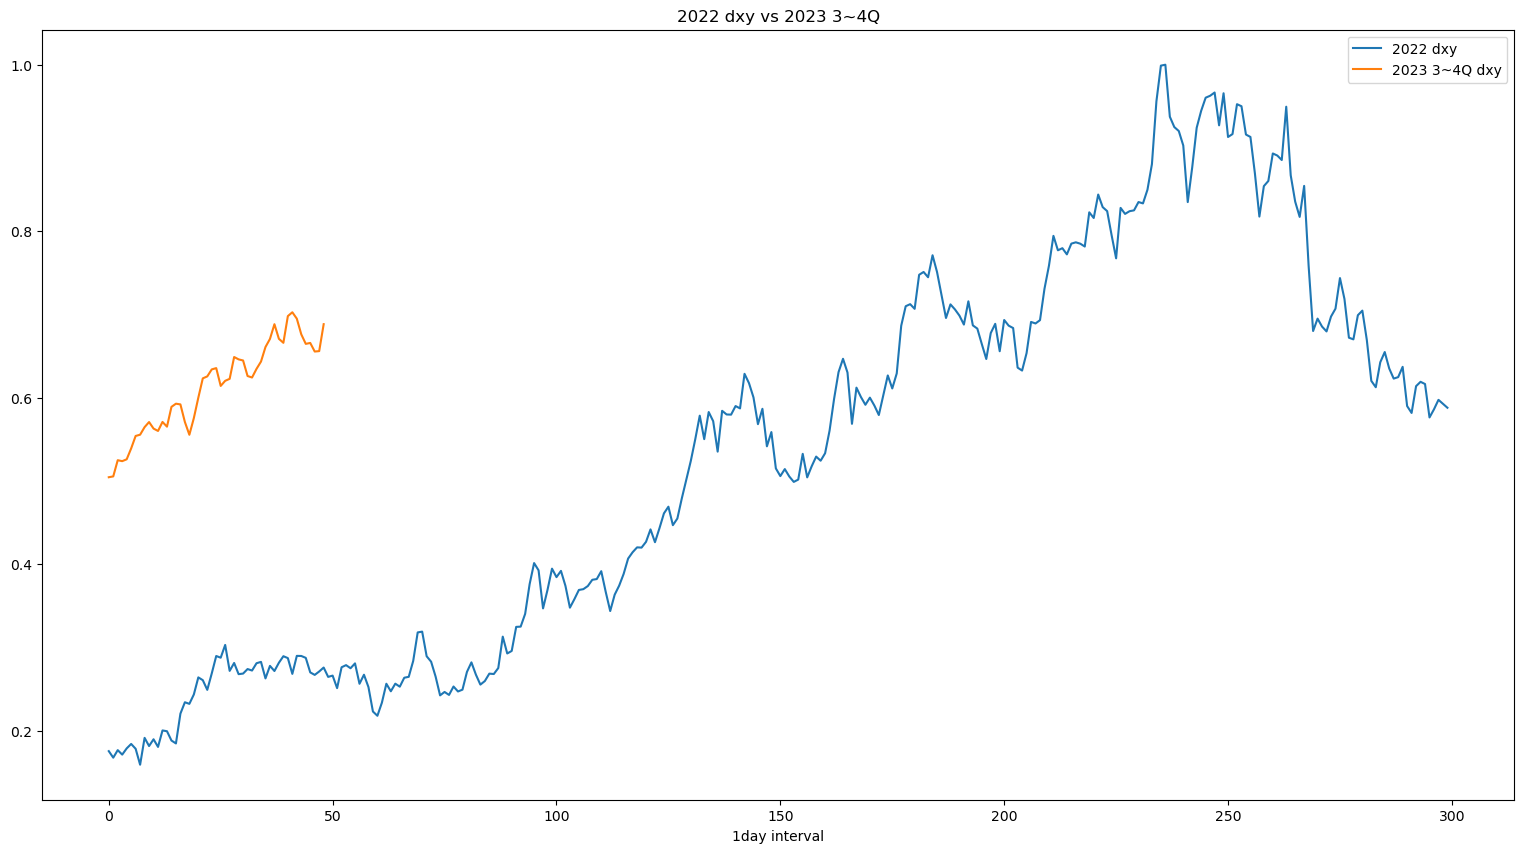

300
49


In [39]:
df_sl_dxy_22 = pd.DataFrame(sl_dxy[200:500], columns = ["dxy"])
df_sl_dxy_23 = pd.DataFrame(sl_dxy[650:], columns = ["dxy"])

plt.figure(figsize = (19,10))
plt.plot(df_sl_dxy_22["dxy"], label = "2022 dxy")
plt.plot(df_sl_dxy_23["dxy"], label = "2023 3~4Q dxy")
plt.title("2022 dxy vs 2023 3~4Q")
plt.xlabel("1day interval")
plt.legend()
plt.show()

print(len(season22_dxy))
print(len(season23_dxy))